<a href="https://colab.research.google.com/github/Rohit6458/-ASRA--AN-INNOVATIVE-ONLINE-PLATFORM-FOR-INTERCONNECTING-THE-CIVIL-ENGINEERING-COMMUNITY/blob/main/Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# If load_boston does not work then download the data and use this.
# Data : https://github.com/afnan47/sem8/blob/master/DL/1_boston_housing.csv
import pandas as pd
df = pd.read_csv("./1_boston_housing.csv")

In [2]:
# Split the dataset
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)


Training set shape: (354, 13) (354, 1)
Testing set shape: (152, 13) (152, 1)


In [3]:
# Define the model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

Epoch 1/100
9/9 [==============================] - 1s 29ms/step - loss: 4351.2886 - mean_absolute_error: 49.7246 - val_loss: 2493.6924 - val_mean_absolute_error: 48.0366
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1532.4545 - mean_absolute_error: 34.6563 - val_loss: 116.4234 - val_mean_absolute_error: 8.3958
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 414.0241 - mean_absolute_error: 17.2374 - val_loss: 374.3666 - val_mean_absolute_error: 16.9109
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 182.2549 - mean_absolute_error: 10.8122 - val_loss: 186.8767 - val_mean_absolute_error: 11.5410
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 159.0228 - mean_absolute_error: 10.4211 - val_loss: 76.2832 - val_mean_absolute_error: 6.3149
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 127.9442 - mean_absolute_error: 8.4175 - val_loss: 89.3720 - val_mean_absolute_error: 6.8849


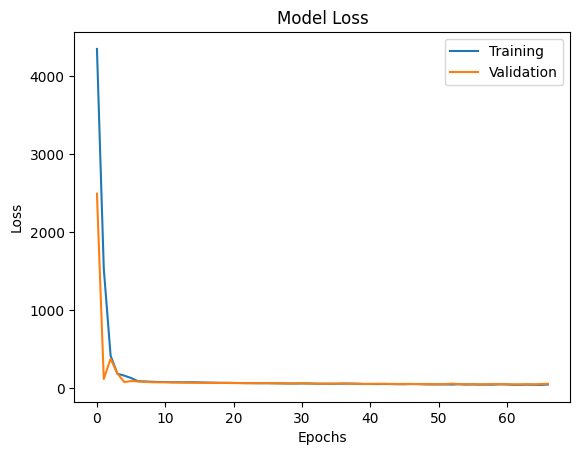

In [5]:
# Train the model
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,callbacks=[early_stopping])

# Plot the training and validation loss over epochs

import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model Loss')
plt.xlabel('Epochs')

plt.ylabel('Loss') 
plt.legend(['Training','Validation'])
plt.show()


In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 600.5466 - mean_absolute_error: 22.6773 - val_loss: 517.1720 - val_mean_absolute_error: 21.1372
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 516.2539 - mean_absolute_error: 20.6579 - val_loss: 386.2051 - val_mean_absolute_error: 17.7620
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 344.9320 - mean_absolute_error: 15.8933 - val_loss: 187.1595 - val_mean_absolute_error: 10.8422
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 168.5711 - mean_absolute_error: 10.1690 - val_loss: 80.3057 - val_mean_absolute_error: 7.1329
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 120.2215 - mean_absolute_error: 8.6113 - val_loss: 75.0259 - val_mean_absolute_error: 6.7634
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 104.3669 - mean_absolute_error: 7.8932 - val_loss: 64.8169 - val_mean_absolute_error: 

In [7]:
loss, mae = model.evaluate(X_test, y_test)
# Print the mean absolute error
print('Mean Absolute Error:', mae)


5/5 [==============================] - 0s 3ms/step - loss: 528.4413 - mean_absolute_error: 21.3362
Mean Absolute Error: 21.336183547973633
